In [1]:
import pandas as pd
import random

# -----------------------------
# Define attributes + choices
# -----------------------------
genders = ["Male", "Female"]
complaints = ["Chest pain", "Breathing difficulty", "Headache", "Fever", "Cough", "Abdominal pain", "Dizziness"]
consciousness = ["Alert", "Drowsy", "Unconscious"]
bleeding_status = ["None", "Minor", "Severe"]
trauma_status = ["Yes", "No"]
breathing_difficulty = ["Yes", "No"]
chest_pain = ["Yes", "No"]
fever = ["Yes", "No"]
cough = ["Yes", "No"]
triage_levels = ["Critical", "Urgent", "Routine"]

# -----------------------------
# Ask user for number of rows
# -----------------------------
num_rows = int(input("Enter number of patient records to generate: "))

# -----------------------------
# Generate dataset
# -----------------------------
data = []
for _ in range(num_rows):
    age = random.randint(1, 100)
    gender = random.choice(genders)
    complaint = random.choice(complaints)
    onset_time = f"{random.randint(0, 23)}:{random.randint(0, 59):02d}"
    duration = random.randint(1, 72)  # hours
    pain_level = random.randint(0, 10)
    consciousness_level = random.choice(consciousness)
    heart_rate = random.randint(40, 180)
    bp_sys = random.randint(80, 200)
    bp_dia = random.randint(50, 120)
    resp_rate = random.randint(10, 40)
    oxygen = random.randint(70, 100)
    temperature = round(random.uniform(35.0, 41.0), 1)
    bleeding = random.choice(bleeding_status)
    trauma = random.choice(trauma_status)
    breathing = random.choice(breathing_difficulty)
    chest = random.choice(chest_pain)
    fever_sym = random.choice(fever)
    cough_sym = random.choice(cough)

    # Assign triage level (basic rules + randomness)
    if oxygen < 85 or heart_rate > 150 or bp_sys < 90 or consciousness_level == "Unconscious":
        triage = "Critical"
    elif pain_level > 6 or chest == "Yes" or breathing == "Yes":
        triage = "Urgent"
    else:
        triage = "Routine"

    data.append([
        age, gender, complaint, onset_time, duration, pain_level, consciousness_level,
        heart_rate, bp_sys, bp_dia, resp_rate, oxygen, temperature,
        bleeding, trauma, breathing, chest, fever_sym, cough_sym, triage
    ])

# -----------------------------
# Create DataFrame
# -----------------------------
columns = [
    "Age", "Gender", "Presenting_Complaint", "Onset_Time", "Duration", "Pain_Level",
    "Consciousness_Level", "Heart_Rate", "Blood_Pressure_Systolic", "Blood_Pressure_Diastolic",
    "Respiratory_Rate", "Oxygen_Saturation", "Temperature", "Bleeding_Status", "Trauma_Status",
    "Breathing_Difficulty", "Chest_Pain", "Fever", "Cough", "Triage_Level"
]

df = pd.DataFrame(data, columns=columns)

# -----------------------------
# Save to CSV
# -----------------------------
df.to_csv("generated_triage_dataset.csv", index=False)
print(f"\n✅ Dataset generated with {num_rows} rows and saved as symptoms_generator_dataset.csv")



✅ Dataset generated with 4000 rows and saved as symptoms_generator_dataset.csv


In [5]:
import pandas as pd

# Load CSV
data = pd.read_csv('generated_triage_dataset.csv')

# Inspect the first few rows
print(data.head())


   Age  Gender  Presenting_Complaint Onset_Time  Duration  Pain_Level  \
0   76  Female  Breathing difficulty       0:42        59           9   
1   24    Male                 Fever      22:44        47           4   
2   34    Male             Dizziness      10:48        61           0   
3   75    Male            Chest pain      10:28        47           2   
4   44  Female             Dizziness      12:25        55           3   

  Consciousness_Level  Heart_Rate  Blood_Pressure_Systolic  \
0              Drowsy          66                      116   
1               Alert          52                      167   
2         Unconscious          87                      159   
3               Alert          87                      128   
4         Unconscious         169                       88   

   Blood_Pressure_Diastolic  Respiratory_Rate  Oxygen_Saturation  Temperature  \
0                       105                12                 88         36.0   
1                        8

In [4]:
# Replace 'Triage_Level' with the actual target column name
X = data.drop('Triage_Level', axis=1)
y = data['Triage_Level']


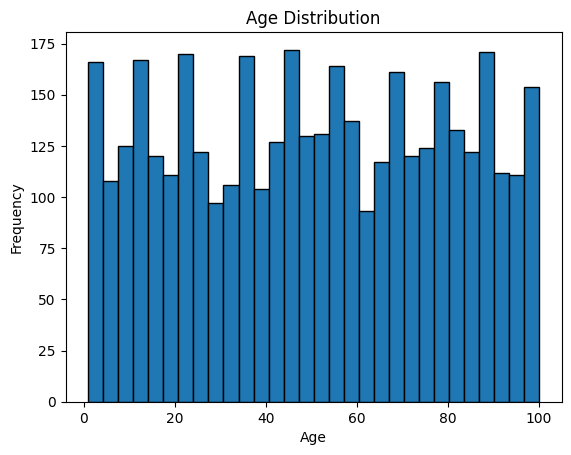

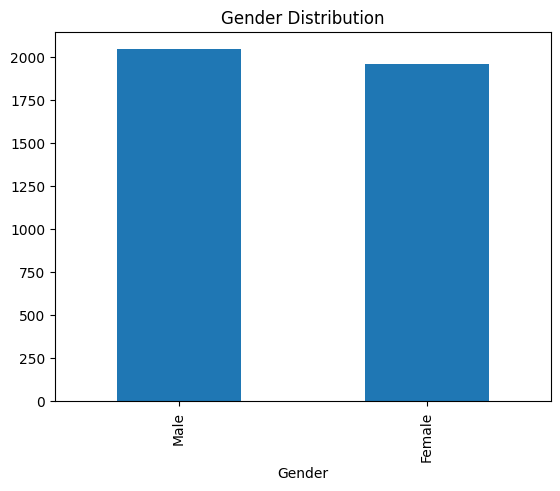

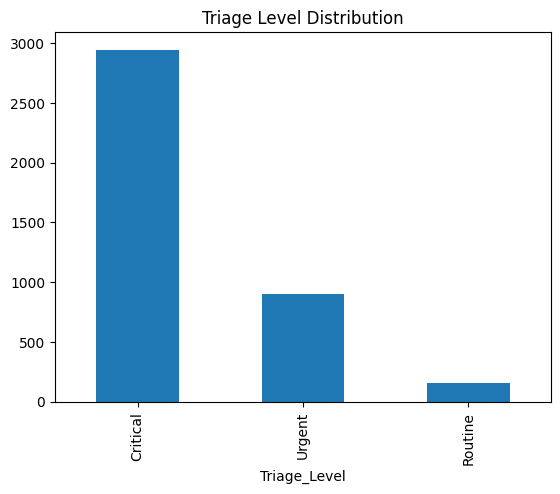

In [6]:
import matplotlib.pyplot as plt

# Age distribution
plt.hist(data['Age'], bins=30, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution
data['Gender'].value_counts().plot(kind='bar', title="Gender Distribution")
plt.show()

# Triage Level distribution
data['Triage_Level'].value_counts().plot(kind='bar', title="Triage Level Distribution")
plt.show()


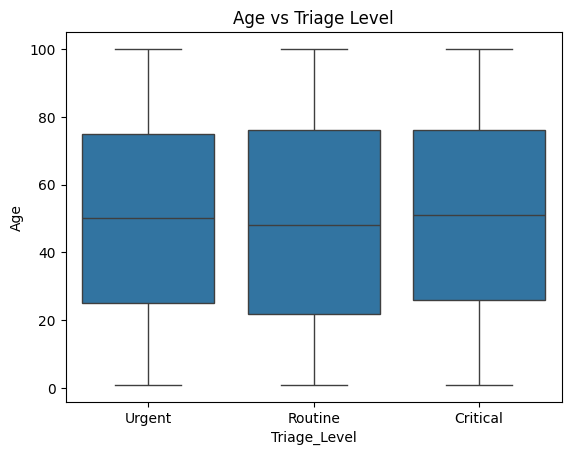

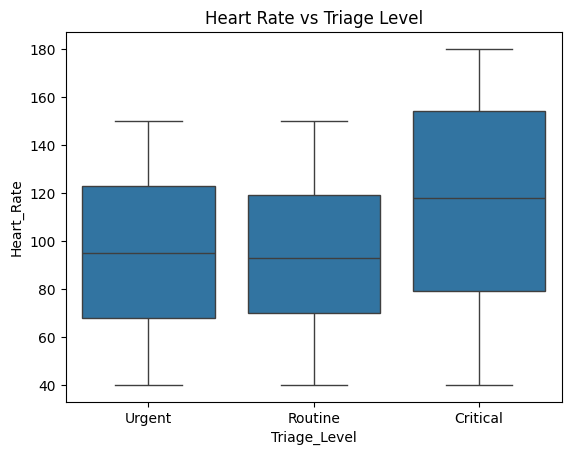

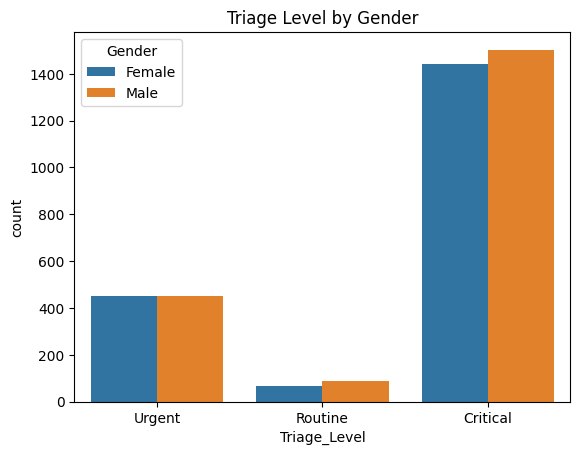

In [8]:
import seaborn as sns

# Age vs Triage Level
sns.boxplot(x="Triage_Level", y="Age", data=data)
plt.title("Age vs Triage Level")
plt.show()

# Heart Rate vs Triage Level
sns.boxplot(x="Triage_Level", y="Heart_Rate", data=data)
plt.title("Heart Rate vs Triage Level")
plt.show()

# Gender vs Triage Level
sns.countplot(x="Triage_Level", hue="Gender", data=data)
plt.title("Triage Level by Gender")
plt.show()


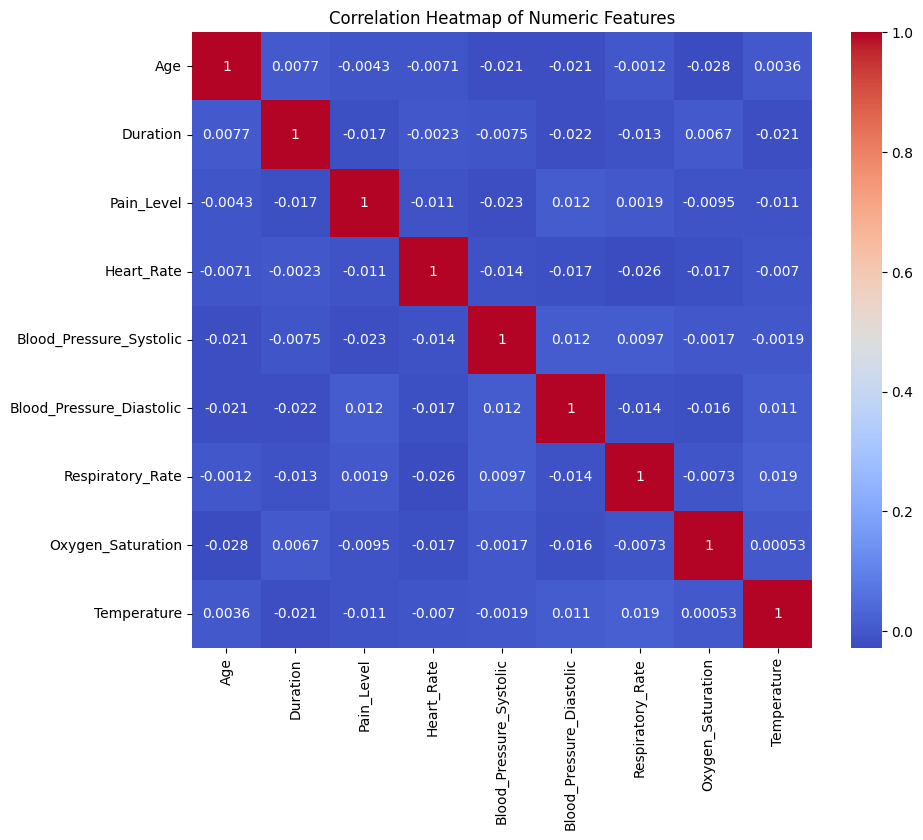

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


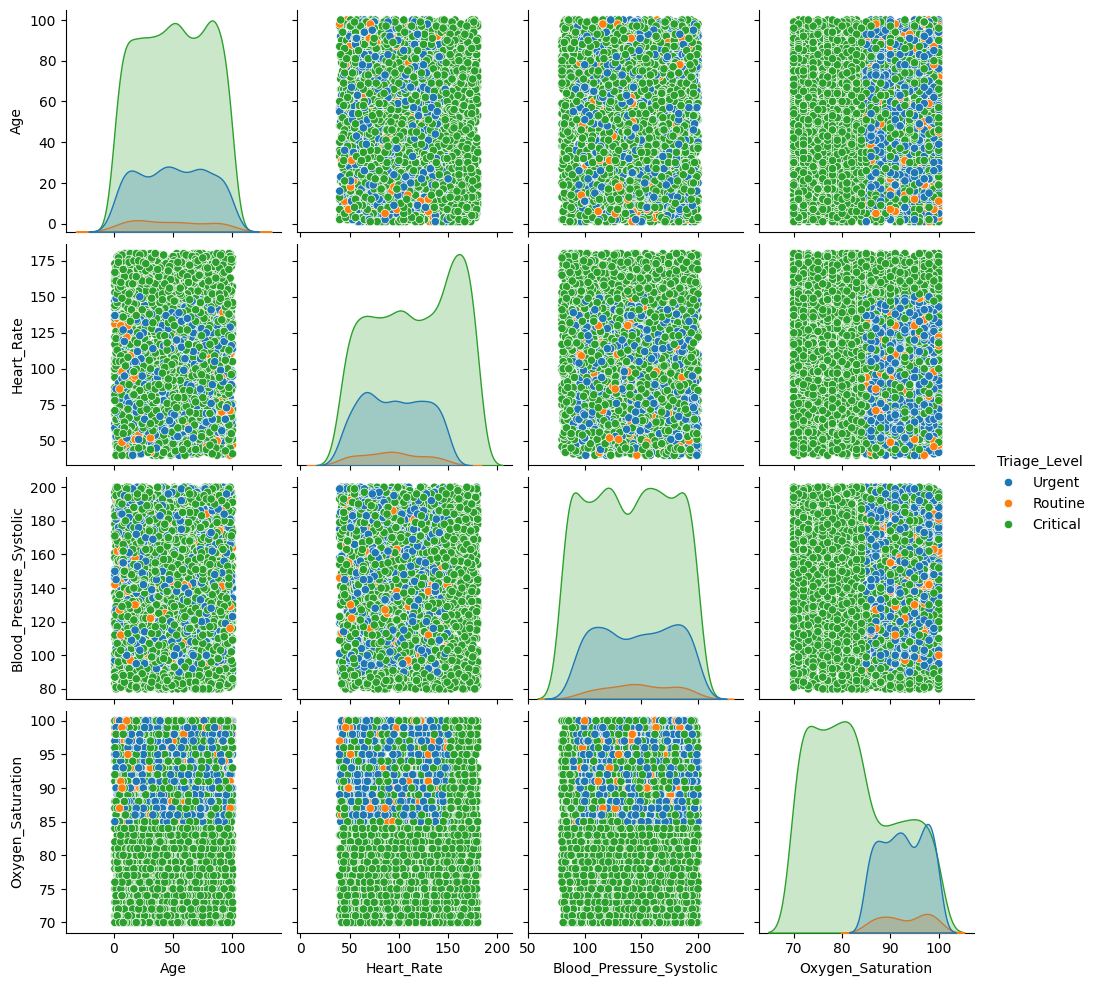

In [11]:
# Pairplot of selected features
sns.pairplot(data[["Age", "Heart_Rate", "Blood_Pressure_Systolic", "Oxygen_Saturation", "Triage_Level"]], hue="Triage_Level")
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00       586
     Routine       1.00      1.00      1.00        26
      Urgent       1.00      1.00      1.00       188

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
import pickle

# Save model
with open('triage_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save metadata (like feature names and label encoders)
metadata = {
    'feature_names': list(X.columns)
    
    
}
 
with open('metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)
